<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Regresion_polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regresión polinómica
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Copia de sensor lb.csv', sep = ';')

In [ ]:
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [ ]:
dataset.shape

(20631, 25)

In [ ]:
# cuál es el máximo número de vuelos por id
max = dataset.groupby('Activo_id').agg({'ciclo':'max'}).reset_index()
max

,Activo_id,ciclo
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


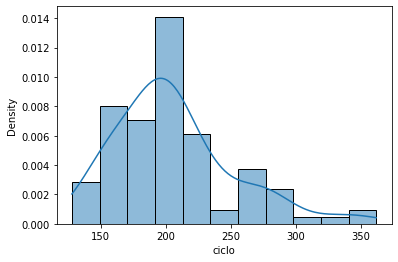

In [ ]:
sns.histplot(data = max, x = 'ciclo',stat = 'density', kde = True )
plt.show()

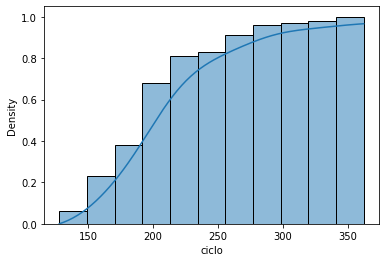

In [ ]:
sns.histplot(data = max, x = 'ciclo',stat = 'density', kde = True, cumulative = 1 )
plt.show()

Text(0, 0.5, 'Probabilidad de fallo')

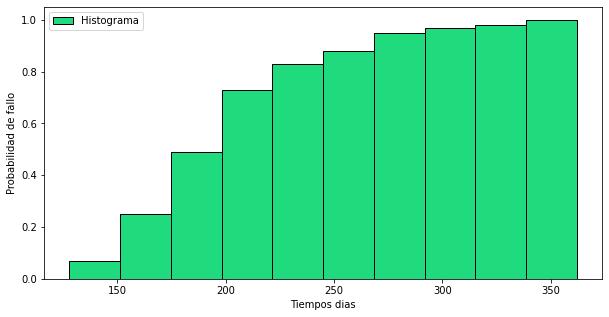

In [ ]:
# Histograma con matplotlib
plt.figure(figsize = (10,5))
x = max.ciclo.values
a = plt.hist(x, density=1,cumulative = 1,bins = 10, color = '#1FDB7D', label = 'Histograma', edgecolor = 'black')
plt.legend(loc = 'best')
plt.xlabel('Tiempos dias')
plt.ylabel('Probabilidad de fallo')

In [ ]:
 y = a[0]
 y

array([0.07, 0.25, 0.49, 0.73, 0.83, 0.88, 0.95, 0.97, 0.98, 1.  ])

In [ ]:
a[1]

array([128. , 151.4, 174.8, 198.2, 221.6, 245. , 268.4, 291.8, 315.2,
       338.6, 362. ])

In [ ]:
# creando los elementos del eje x con igual cantidad de datos qeu el del eje y
x1 = np.linspace(x.min(),x.max(),10)
x1

array([128., 154., 180., 206., 232., 258., 284., 310., 336., 362.])

In [ ]:
# ordenando los arrays: que se redimensiones como vector unitario
eje_x = x1.reshape(-1,1)
eje_y = y.reshape(-1,1)

In [ ]:
eje_x[:6]

array([[128.],
       [154.],
       [180.],
       [206.],
       [232.],
       [258.]])

In [ ]:
# Matriz de características
X = eje_x
Y = eje_y

#como hay pocos datos no se divide en conjuntos de entrenamiento y testing
X_train = X
Y_train = Y

In [ ]:
# Importamos la libreria de regresiones lineales (simple y múltiple)

from sklearn.linear_model import LinearRegression

In [ ]:
# Importamos la libreria de regresión polinómica
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)   # Se escoge el grado del polinomio
X_poly = poly_reg.fit_transform(X)          # Se ajusta el polnomio a X
lin_reg_2 = LinearRegression()              # Se hace una regresion lineal simple
lin_reg_2.fit(X_poly,y)                     # Se ajusta la regresion lineal a X


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Creando una predicción
y_pred = lin_reg_2.predict(X_poly)
y_pred

array([0.0372028 , 0.30305361, 0.5162704 , 0.68223776, 0.80634033,
       0.8939627 , 0.95048951, 0.98130536, 0.99179487, 0.98734266])

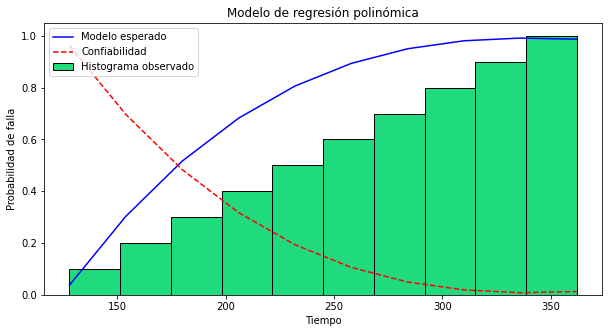

In [ ]:
plt.figure(figsize = (10,5))

# Visualización de los resultados del modelo polinómico
plt.hist(X_train, density = 1,cumulative = 1,bins = 10,color = '#1FDB7D', label = 'Histograma observado', edgecolor = 'black')
plt.plot(X_train,y_pred, color = 'blue', label = 'Modelo esperado')
plt.plot(X_train,1- y_pred, color = 'red',ls = '--', label = 'Confiabilidad')
plt.title('Modelo de regresión polinómica')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de falla')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Hacer predicciones puntuales
lin_reg_2.predict(poly_reg.fit_transform([[300]]))

array([0.9721527])

In [ ]:
# Indicadores de evaluación del modelo
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_train))

In [ ]:
len(y_pred)

10

In [ ]:
compara = np.concatenate([Y_train.reshape(-1,1),y_pred.reshape(-1,1)], axis = 1)
data_comp = pd.DataFrame(compara,columns = ['real','modelo'])
data_comp.head()

,real,modelo
0,0.07,0.037203
1,0.25,0.303054
2,0.49,0.516270
3,0.73,0.682238
4,0.83,0.806340


In [ ]:
data_comp.corr()

,real,modelo
real,1.000000,0.995951
modelo,0.995951,1.000000


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(y_pred,Y_train))
print(mean_absolute_error(y_pred,Y_train))
print(1 - mean_absolute_error(y_pred,Y_train)) #Exactitud

0.000804382284382298
0.023375291374104386
0.9766247086258956
